In [1]:
from __future__ import absolute_import
from __future__ import print_function
import os
import glob
import random
import numpy as np
from keras import optimizers
from keras.layers import LSTM
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.layers.wrappers import TimeDistributed
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Input
from keras.layers.core import Activation, Flatten, Reshape
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.applications import imagenet_utils

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
height = 120
width = 240
path = '../datasets/'
allfiles = glob.glob(path+'sensory/tile/*.npy')
sali = glob.glob(path+'content/saliencyImages/*.npy')
motion = glob.glob(path+'content/motionImages/*.npy')
prob = glob.glob(path+'sensory/tileProb/*.npy')

def myGenerator():
    while True:
        index_list = random.sample(range(1, 23999), 3)
        alldata_x = []
        alldata_y = []
        for i in index_list:
            f = allfiles[i]
            s = f.split('_')
            saliFile = '../datasets/content/saliencyImages/'+s[0][25:]+'_saliency_'+s[2].split('.')[0]+'.npy'
            motionFile = '../datasets/content/motionImages/'+s[0][25:]+'_motion_'+s[2].split('.')[0]+'.npy'
            probFile = '../datasets/sensory/tileProb/'+s[0][25:]+'_user'+s[1][4:]+'_'+s[2].split('.')[0]+'.npy'
            a = np.load(f)
            b = np.load(saliFile)
            c = np.load(motionFile)
            d = [a, b, c]
            alldata_x.append(d)
            alldata_y.append(np.load(probFile))
        alldata_x = np.array(alldata_x)
        alldata_x = np.rollaxis(alldata_x, 1, 5)  
        #alldata_x = alldata_x.reshape((32, 30, height, width, 3))
        #alldata_x = np.swapaxes(alldata_x, 1, 4)
        alldata_y = np.array(alldata_y)
        yield alldata_x, alldata_y
# x = myGenerator()
# xtrain, ytrain = next(x)
# print('xtrain shape:',xtrain.shape)
# print('ytrain shape:',ytrain.shape)

In [3]:
# load the numpy arrays from saliency, motion maps and sensor data
sali = glob.glob(path+'content/saliencyImages/*.npy')
motion = glob.glob(path+'content/motionImages/*.npy')
sensory = glob.glob(path+'sensory/tile/*.npy')
input_shape=(30, height, width, 3)

In [7]:
def mySegNet(input_shape):
    base_model  = MobileNet(input_shape=(224,224,3), include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs=base_model.input, outputs=x)
    
    model = Sequential();
    model.add(TimeDistributed(cnn_model, input_shape=input_shape))
    model.add(TimeDistributed(Flatten()))
    
    model.add(LSTM(200, return_sequences=True))
    model.compile(optimizer='adam', loss='mean_squared_error')
    #print(model.summary())
    return model 

In [ ]:
input_shape=(30, height, width, 3)
model = mySegNet(input_shape)

model.fit_generator(generator=myGenerator(),
                    use_multiprocessing=True,
                   steps_per_epoch=300, epochs=100)
model.save('model1.h5')
model.save_weights('model_weights1.h5')


In [6]:
model.fit_generator(generator=myGenerator(),
                    use_multiprocessing=True,
                   steps_per_epoch=300, epochs=100)
model.save('model2.h5')
model.save_weights('model_weights2.h5')

Epoch 1/100
300/300 [==============================] - 168s 560ms/step - loss: 0.1071
Epoch 2/100
300/300 [==============================] - 167s 558ms/step - loss: 0.1117
Epoch 3/100
300/300 [==============================] - 168s 560ms/step - loss: 0.1134
Epoch 4/100
300/300 [==============================] - 167s 557ms/step - loss: 0.1057
Epoch 5/100
300/300 [==============================] - 168s 558ms/step - loss: 0.1036
Epoch 6/100
300/300 [==============================] - 169s 563ms/step - loss: 0.1098
Epoch 7/100
300/300 [==============================] - 167s 557ms/step - loss: 0.1048
Epoch 8/100
300/300 [==============================] - 168s 561ms/step - loss: 0.1061
Epoch 9/100
300/300 [==============================] - 166s 554ms/step - loss: 0.1042
Epoch 10/100
300/300 [==============================] - 168s 560ms/step - loss: 0.1074
Epoch 11/100
300/300 [==============================] - 169s 563ms/step - loss: 0.1091
Epoch 12/100
300/300 [==============================

In [7]:
model.fit_generator(generator=myGenerator(),
                    use_multiprocessing=True,
                   steps_per_epoch=300, epochs=100)
model.save('model3.h5')
model.save_weights('model_weights3.h5')

Epoch 1/100
300/300 [==============================] - 170s 566ms/step - loss: 0.0126
Epoch 2/100
300/300 [==============================] - 170s 565ms/step - loss: 0.0121
Epoch 3/100
300/300 [==============================] - 168s 559ms/step - loss: 0.0129
Epoch 4/100
300/300 [==============================] - 169s 563ms/step - loss: 0.0122
Epoch 5/100
300/300 [==============================] - 169s 564ms/step - loss: 0.0124
Epoch 6/100
300/300 [==============================] - 169s 564ms/step - loss: 0.0120
Epoch 7/100
300/300 [==============================] - 169s 565ms/step - loss: 0.0118
Epoch 8/100
300/300 [==============================] - 169s 564ms/step - loss: 0.0118
Epoch 9/100
300/300 [==============================] - 169s 564ms/step - loss: 0.0127
Epoch 10/100
300/300 [==============================] - 169s 564ms/step - loss: 0.0116
Epoch 11/100
300/300 [==============================] - 168s 561ms/step - loss: 0.0116
Epoch 12/100
300/300 [==============================

In [10]:
count = 0
batchSize = 3
allfiles = glob.glob('../datasets/testData/sens/*.npy')
def myTestDataGenerator():
    global count
    while True:
        index_list = range(count, count+batchSize)
        count += batchSize
        alldata_x = []
        alldata_y = []
        for i in index_list:
            f = allfiles[i]
            s = f.split('_')
            saliFile = '../datasets/content/saliencyImages/'+s[0][25:]+'_saliency_'+s[2].split('.')[0]+'.npy'
            motionFile = '../datasets/content/motionImages/'+s[0][25:]+'_motion_'+s[2].split('.')[0]+'.npy'
            probFile = '../datasets/sensory/tileProb/'+s[0][25:]+'_user'+s[1][4:]+'_'+s[2].split('.')[0]+'.npy'
            a = np.load(f)
            b = np.load(saliFile)
            c = np.load(motionFile)
            d = [a, b, c]
            alldata_x.append(d)
            alldata_y.append(np.load(probFile))
        alldata_x = np.array(alldata_x)
        alldata_x = np.rollaxis(alldata_x, 1, 5)  
        #alldata_x = alldata_x.reshape((32, 30, height, width, 3))
        #alldata_x = np.swapaxes(alldata_x, 1, 4)
        alldata_y = np.array(alldata_y)
        yield alldata_x, alldata_y
# x = myTestDataGenerator()
# xtest, ytest = next(x)
# print('xtrain shape:',xtest.shape)
# print('ytrain shape:',ytest.shape)

In [60]:
tileFrames = []
for sample in ytrue[:1]:
    for frames in sample:
        t = []
        for frame in frames:
            f = []
            for i, j in enumerate(frame):
                if j!=0:
                    f.append(i+1)
            tileFrames.append(f)
print(np.array(tileFrames).shape)

(90,)


In [59]:
pTileFrames = []
for sample in predictions[:3]:
    for frames in sample:
        f = []
        for i, j in enumerate(frames):
            if j!=0:
                f.append(i+1)
        pTileFrames.append(f)
print(np.array(pTileFrames).shape)

(90,)


[67, 68, 69, 70, 86, 87, 88, 89, 90, 91, 106, 107, 108, 109, 110, 111, 126, 127, 128, 129, 130, 131, 146, 147, 148, 149, 150, 151, 167, 168, 169, 170]


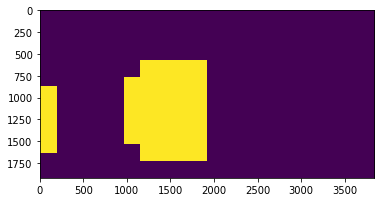

In [82]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

breadth = 3840
width = 1920
tileSize = 192
tilesInColumn = width / tileSize
for i, tiles in enumerate(tileFrames):
    frame = np.zeros(width*breadth)
    print(tiles)
    for tileNo in tiles:
        tileRowNumber = int((tileNo - 1) / tilesInColumn)
        tileColumnNumber = (tileNo - 1) % tilesInColumn
        firstPixel = tileRowNumber * width * tileSize + tileColumnNumber * tileSize
        for rowPixel in range(0, tileSize):
            for columnPixel in range(0, tileSize):
                frame[int(firstPixel + rowPixel * breadth + columnPixel)] = 255
    frame = frame.reshape((width, breadth))
    plt.imshow(frame, interpolation='nearest')
    plt.show()
    break

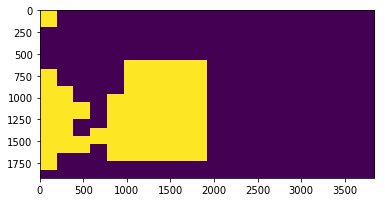

In [83]:
for i, tiles in enumerate(pTileFrames):
    frame = np.zeros(width*breadth)
    for tileNo in tiles:
        tileRowNumber = int((tileNo - 1) / tilesInColumn)
        tileColumnNumber = (tileNo - 1) % tilesInColumn
        firstPixel = tileRowNumber * width * tileSize + tileColumnNumber * tileSize
        for rowPixel in range(0, tileSize):
            for columnPixel in range(0, tileSize):
                frame[int(firstPixel + rowPixel * breadth + columnPixel)] = 255
    frame = frame.reshape((width, breadth))
    plt.imshow(frame, interpolation='nearest')
    plt.show()
    break

In [ ]:
index  = 28
thresh = 0.5

temp = predictions[0][index] 
temp[temp > thresh] = 1
temp[temp <= thresh] = 0

for i, j in enumerate(ytest[0][index]):
    if ytest[0][index][i] != temp[i]:
        print('Index: ', i, 'Value: ', ytest[0][index][i], temp[i])

In [ ]:
print(ytest[0][index].shape)